### EX 1.

In [3]:
#Date
P_B = 0.01
sensitivity = 0.95  # P(Test+ | B)
specificity = 0.90  # P(Test- | not B)

# a) P(B | Test+) = ?
P_not_B = 1 - P_B
P_pos_given_not_B = 1 - specificity

# P(Test+) prin legea probabilitatii totale
P_pos = sensitivity * P_B + P_pos_given_not_B * P_not_B

# Teorema lui Bayes
P_B_given_pos = (sensitivity * P_B) / P_pos

print("a) P(B | Test = Pozitiv):")
print(f"P(Test+) = {sensitivity} * {P_B} + {P_pos_given_not_B} * {P_not_B}")
print(f"P(Test+) = {P_pos:.4f}")
print(f"P(B | Test+) = ({sensitivity} * {P_B}) / {P_pos:.4f}")
print(f"P(B | Test+) = {P_B_given_pos:.4f} = {P_B_given_pos*100:.2f}%")
print()

# b) Specificitatea minima pentru P(B | Test+) >= 0.5

s_min = 1 - (0.00475 / 0.495)

print("b) Specificitatea minima pentru P(B | Test+) >= 50%:")
print(f"s_min = {s_min:.5f} = {s_min*100:.2f}%")

a) P(B | Test = Pozitiv):
P(Test+) = 0.95 * 0.01 + 0.09999999999999998 * 0.99
P(Test+) = 0.1085
P(B | Test+) = (0.95 * 0.01) / 0.1085
P(B | Test+) = 0.0876 = 8.76%

b) Specificitatea minima pentru P(B | Test+) >= 50%:
s_min = 0.99040 = 99.04%


### Ex2


Date observate:
  - Total apeluri: 180
  - Interval de timp: 10 ore
  - Rata observata: 18.0 apeluri/ora

────────────────────────────────────────────────────────────
Prior: Gamma(α=1, β=0.1)
  - Media prior: 10.00
  - Varianta prior: 100.00

────────────────────────────────────────────────────────────
a) Distributia posterioara:
   λ | X ~ Gamma(α=181, β=10.1)
   - Media posterioara: 17.9208 apeluri/ora
   - Varianta posterioara: 1.7743

────────────────────────────────────────────────────────────
c) Valoarea cea mai probabila (modul):
   Mode(λ) = (α - 1) / β = 17.8218 apeluri/ora

────────────────────────────────────────────────────────────
b) Intervalul HDI de 94%:
   HDI 94% = [15.5967, 20.5738] apeluri/ora
Generare grafic...


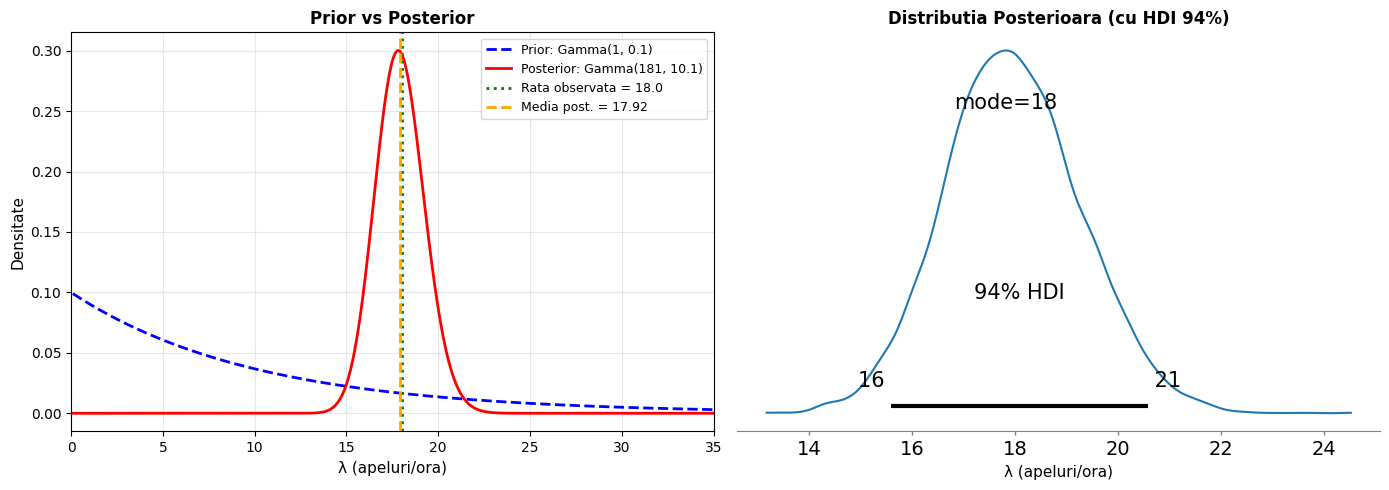

REZUMAT:
 Distributia posterioara: Gamma(181, 10.1)
 Modul (cel mai probabil): 17.8218 apeluri/ora
 Media posterioara: 17.9208 apeluri/ora
 HDI 94%: [15.5967, 20.5738] apeluri/ora


In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

# Date observate
k = 180  # Total apeluri in 10 ore
T = 10   # Numar de ore
observed_rate = k / T  # Rata observata: 18 apeluri/ora

print(f"\nDate observate:")
print(f"  - Total apeluri: {k}")
print(f"  - Interval de timp: {T} ore")
print(f"  - Rata observata: {observed_rate} apeluri/ora")

alpha_prior = 1      # Shape parameter
beta_prior = 0.1     # Rate parameter

prior_mean = alpha_prior / beta_prior
prior_var = alpha_prior / (beta_prior ** 2)

print(f"\n{'─' * 60}")
print(f"Prior: Gamma(α={alpha_prior}, β={beta_prior})")
print(f"  - Media prior: {prior_mean:.2f}")
print(f"  - Varianta prior: {prior_var:.2f}")

# a) Distributia posterioara (Poisson-Gamma conjugat)
alpha_post = alpha_prior + k      
beta_post = beta_prior + T

print(f"\n{'─' * 60}")
print(f"a) Distributia posterioara:")
print(f"   λ | X ~ Gamma(α={alpha_post}, β={beta_post})")

# Media si varianta posterioara
post_mean = alpha_post / beta_post
post_var = alpha_post / (beta_post ** 2)
print(f"   - Media posterioara: {post_mean:.4f} apeluri/ora")
print(f"   - Varianta posterioara: {post_var:.4f}")

# c) Modul distributiei posterioare
if alpha_post > 1:
    post_mode = (alpha_post - 1) / beta_post
else:
    post_mode = 0
    
print(f"\n{'─' * 60}")
print(f"c) Valoarea cea mai probabila (modul):")
print(f"   Mode(λ) = (α - 1) / β = {post_mode:.4f} apeluri/ora")

# b) Intervalul HDI de 94%
samples = stats.gamma.rvs(alpha_post, scale=1/beta_post, size=10000, random_state=42)

# Calculam HDI folosind ArviZ
hdi_94 = az.hdi(samples, hdi_prob=0.94)

print(f"\n{'─' * 60}")
print(f"b) Intervalul HDI de 94%:")
print(f"   HDI 94% = [{hdi_94[0]:.4f}, {hdi_94[1]:.4f}] apeluri/ora")

print("Generare grafic...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grafic 1: Comparatia Prior vs Posterior
lambda_range = np.linspace(0.1, 35, 1000)
prior_pdf = stats.gamma.pdf(lambda_range, alpha_prior, scale=1/beta_prior)
post_pdf = stats.gamma.pdf(lambda_range, alpha_post, scale=1/beta_post)

axes[0].plot(lambda_range, prior_pdf, 'b--', label=f'Prior: Gamma({alpha_prior}, {beta_prior})', linewidth=2)
axes[0].plot(lambda_range, post_pdf, 'r-', label=f'Posterior: Gamma({alpha_post}, {beta_post})', linewidth=2)
axes[0].axvline(observed_rate, color='green', linestyle=':', label=f'Rata observata = {observed_rate}', linewidth=2)
axes[0].axvline(post_mean, color='orange', linestyle='--', label=f'Media post. = {post_mean:.2f}', linewidth=2)
axes[0].set_xlabel('λ (apeluri/ora)', fontsize=11)
axes[0].set_ylabel('Densitate', fontsize=11)
axes[0].set_title('Prior vs Posterior', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(0, 35)

# Grafic 2: Posterior cu HDI si mod (folosind ArviZ)
az.plot_posterior(samples, hdi_prob=0.94, point_estimate='mode', ax=axes[1])
axes[1].set_xlabel('λ (apeluri/ora)', fontsize=11)
axes[1].set_title('Distributia Posterioara (cu HDI 94%)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('lab6_ex2_posterior.png', dpi=150, bbox_inches='tight')
plt.show()

print("REZUMAT:")
print(f" Distributia posterioara: Gamma({alpha_post}, {beta_post})")
print(f" Modul (cel mai probabil): {post_mode:.4f} apeluri/ora")
print(f" Media posterioara: {post_mean:.4f} apeluri/ora")
print(f" HDI 94%: [{hdi_94[0]:.4f}, {hdi_94[1]:.4f}] apeluri/ora")